### Flipkart Laptop Data 
- Business Insights on Product Pricing

### Problem Statement
#### Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.

- -He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.
- Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.
- To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.
- Now he needs your (i.e Data Scientist’s) help to solve the following problem.

### Data Analysis and Mining
- Musk’s Requirements
- Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
- Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.

### ML Model Tuning
- Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
- First try to check if the models you have created are a best fit or not.
- See if applying cross validation helps improve your models performance.

### Required Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\laptop_details (1).csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


### Extracting columns Processor, RAM, Operating System, Storage, Brand from Features column

In [6]:
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))
df['Brand'].head()

0    Lenovo
1    Lenovo
2      ASUS
3        HP
4      ASUS
Name: Brand, dtype: object

In [7]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor_Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor_Type']=df['Processor_Type'].apply(lambda x : ''.join(x))
df['Processor_Type']=df['Processor_Type'].apply(lambda x: x.replace(" Processor", ""))

In [8]:
df['Processor_Type'].head()

0            Intel Core i3
1            Intel Core i3
2            Intel Core i3
3    AMD Ryzen 5 Hexa Core
4            Intel Core i5
Name: Processor_Type, dtype: object

In [9]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating_System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating_System']=df['Operating_System'].apply(lambda x : ''.join(x))
df['Operating_System']=df['Operating_System'].apply(lambda x: x.replace(" Operating System", ""))

In [10]:
df['Operating_System'].head()

0    64 bit Windows 11
1    64 bit Windows 11
2    64 bit Windows 11
3    64 bit Windows 10
4           Windows 11
Name: Operating_System, dtype: object

In [11]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df['RAM'].head()

0    8 GB DDR4 RAM
1    8 GB DDR4 RAM
2    8 GB DDR4 RAM
3    8 GB DDR4 RAM
4    8 GB DDR4 RAM
Name: RAM, dtype: object

In [12]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))
df['Storage'].head()

0    256 GB SSD
1    512 GB SSD
2    512 GB SSD
3    512 GB SSD
4    512 GB SSD
Name: Storage, dtype: object

### MRP column Type conversion

In [13]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
df['MRP'][:5]

0    36990
1    39990
2    32990
3    49990
4    49990
Name: MRP, dtype: int32

In [14]:
df['Display_inchs'] = df['Feature'].apply(lambda x: "".join(re.findall('(?:\d+|\d+.\d+)\sinch|(?:\d+|\d+.\d+)\sInch',x)))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace(' inch',''))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace(' Inch',''))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('1414','14'))
df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('206015.615.6','15.6'))
df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('15.615.6','15.6'))

df['Display_inchs'].replace('',np.nan,inplace=True)

df['Display_inchs'].head()


0      14
1    15.6
2    15.6
3    15.6
4    15.6
Name: Display_inchs, dtype: object

In [15]:
df["RAM_Type"]=df["RAM"].apply(lambda x : "".join(re.findall("GB (.+).RAM",x)))

In [16]:
df["RAM"]=df["RAM"].apply(lambda x : "".join(re.findall("\d+ GB",x)))

In [17]:
df['RAM_Type'].head()

0    DDR4
1    DDR4
2    DDR4
3    DDR4
4    DDR4
Name: RAM_Type, dtype: object

In [18]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor_Type,Operating_System,RAM,Storage,Display_inchs,RAM_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB,256 GB SSD,14,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB,512 GB SSD,15.6,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8 GB,512 GB SSD,15.6,DDR4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    int32  
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Processor_Type    720 non-null    object 
 6   Operating_System  720 non-null    object 
 7   RAM               720 non-null    object 
 8   Storage           720 non-null    object 
 9   Display_inchs     718 non-null    object 
 10  RAM_Type          720 non-null    object 
dtypes: float64(1), int32(1), object(9)
memory usage: 59.2+ KB


In [20]:
df.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor_Type        0
Operating_System      0
RAM                   0
Storage               0
Display_inchs         2
RAM_Type              0
dtype: int64

In [21]:
df[df['Processor_Type']=='']

,Product,Rating,MRP,Feature,Brand,Processor_Type,Operating_System,RAM,Storage,Display_inchs,RAM_Type
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,38990,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL,,Windows 11,8 GB,1 TB HDD256 GB SSD,15.6,DDR4
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,8 GB,256 GB SSD,14,DDR4
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,8 GB,256 GB SSD,14,DDR4
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...,4.4,47990,Free upgrade to Windows 11 when availableAMD R...,acer,,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
53,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,8 GB,512 GB SSD,14,DDR4
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,47990,Free upgrade to Windows 11 when availableIntel...,acer,,64 bit Windows 10,8 GB,512 GB SSD,15.6,DDR4
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...,4.6,70990,Processor: AMD Ryzen R5-5600H (3.30 GHz up to ...,DELL,,64 bit Windows 11,16 GB,512 GB SSD,15.6,DDR4
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,,Windows 11,4 GB,,14,LPDDR4X
94,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,4.2,30428,Processor: Intel PQC-N5030 (1.10 GHz up to 3.1...,DELL,,64 bit Windows 11,8 GB,256 GB SSD,15.6,DDR4
116,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,8 GB,512 GB SSD,14,DDR4


In [22]:
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Gen Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'

In [23]:
df['Processor_Type'].value_counts()

Intel Core i5                   155
Intel Core i3                   131
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    55
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            43
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel i3-1115G4                   2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Intel Core i3-1005G1              1
Intel Core i5-1135G7              1
AMD Dual Core                     1
Intel Core i5 Pro                 1
AMD Ryzen 5-3450U                 1
Intel i7-11800H                   1
AMD Ryzen 5 Dual Core             1
Intel PQC-N5030                   1
Intel i3-1125G4             

In [24]:
df['Processor_Type'].replace("Gen Intel Evo Core i5","Intel Evo Core i5", inplace=True)

In [25]:
df[['Processor','x','y','z','a']]=df['Processor_Type'].str.split(" ", expand=True)
df.drop(['Processor_Type','x','y','z','a'], axis=1, inplace=True)
df['Processor'].value_counts()

Intel       390
AMD         310
Apple        19
Qualcomm      1
Name: Processor, dtype: int64

In [26]:
df['Operating_System'].value_counts()

64 bit Windows 11                     404
Windows 11                            156
64 bit Windows 10                     115
MMac OS                                19
Windows 10                             12
MChrome                                 6
OS                                      2
64 bit DOS                              2
32 bit Windows 11                       1
5Operating System64 bit Windows 10      1
 Windows 1064 bit Windows 10            1
64 bit Chrome                           1
Name: Operating_System, dtype: int64

In [27]:
len(df[df['Operating_System']==''])

0

In [28]:
df['Operating_System'].replace({'MMac OS':'Mac', 'OS':'Mac', 'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                               ' Windows 1064 bit Windows 10':'Windows 10',
                               '64 bit Chrome':'Chrome'}, inplace=True)

df['Operating_System']=df['Operating_System'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ','').replace('64 bit ',''))
df['Operating_System'].value_counts()

Windows 11    561
Windows 10    129
Mac            21
Chrome          7
DOS             2
Name: Operating_System, dtype: int64

In [29]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB512 GB8 GB","8 GB"))

In [30]:
df['RAM'].value_counts()

8 GB     403
16 GB    263
4 GB      37
32 GB     17
Name: RAM, dtype: int64

In [31]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("64GB EMMC","64 GB"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("128GB EMMC","64 GB"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("32GB EMMC","32 GB"))
df['RAM_Type'].value_counts()

DDR4                                                                                           560
DDR5                                                                                            92
LPDDR4X                                                                                         37
Unified Memory                                                                                  12
LPDDR5                                                                                           9
LPDDR4                                                                                           8
SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4      1
LPDDR3                                                                                           1
Name: RAM_Type, dtype: int64

In [32]:
df['RAM_Type']=df['RAM_Type'].apply(lambda x: x.replace("SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4","DDR4"))
df['RAM_Type']=df['RAM_Type'].apply(lambda x: x.replace("Unified Memory","Unified"))

In [33]:
df['RAM_Type'].value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
Unified     12
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_Type, dtype: int64

In [34]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [35]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Storage,Display_inchs,RAM_Type,Processor
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Windows 11,4 GB,,14,LPDDR4X,Qualcomm
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,4 GB,,14,DDR4,Intel
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,4 GB,,14,DDR4,Intel
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,,11.6,LPDDR4,Intel
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,,15.6,LPDDR4,Intel
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,4 GB,,11.6,DDR4,Intel
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,4 GB,,11.6,DDR4,Intel
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Chrome,4 GB,,11.6,LPDDR4X,Intel
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,,14,LPDDR4,Intel
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,,11.6,LPDDR4,Intel


In [36]:
len(df[df['Storage']==''])

10

In [37]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [38]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [39]:
df['Disc Size'].value_counts()

512GB    375
1TB      223
256GB     99
          10
2TB        7
128GB      6
Name: Disc Size, dtype: int64

In [40]:
df[df['Disc Size']=='']

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Windows 11,4 GB,14,LPDDR4X,Qualcomm,,None
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,4 GB,14,DDR4,Intel,,None
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,4 GB,14,DDR4,Intel,,None
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,,None
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,15.6,LPDDR4,Intel,,None
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,4 GB,11.6,DDR4,Intel,,None
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,4 GB,11.6,DDR4,Intel,,None
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Chrome,4 GB,11.6,LPDDR4X,Intel,,None
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,14,LPDDR4,Intel,,None
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,,None


In [41]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Brand', 'Operating_System',
       'RAM', 'Display_inchs', 'RAM_Type', 'Processor', 'Disc Size',
       'Disc Type'],
      dtype='object')

In [42]:
df.iloc[83,-2]='128GB'
df.iloc[89,-2]='64GB'
df.iloc[96,-2]='64GB'
df.iloc[345,-2]='32GB'
df.iloc[509,-2]='64GB'
df.iloc[544,-2]='64GB'
df.iloc[559,-2]='64GB'
df.iloc[632,-2]='128GB'
df.iloc[695,-2]='64GB'
df.iloc[715,-2]='64GB'

In [43]:
df['Disc Size'].value_counts()

512GB    375
1TB      223
256GB     99
128GB      8
64GB       7
2TB        7
32GB       1
Name: Disc Size, dtype: int64

In [44]:
df['Disc Type'].value_counts()

SSD    662
HDD     48
Name: Disc Type, dtype: int64

In [45]:
df.drop(['Product','Feature'],axis=1,inplace=True)

In [46]:
df.head()

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [47]:
df.isnull().sum()

Rating              139
MRP                   0
Brand                 0
Operating_System      0
RAM                   0
Display_inchs         2
RAM_Type              0
Processor             0
Disc Size             0
Disc Type            10
dtype: int64

In [48]:
df['Disc Type']=df['Disc Type'].fillna(df['Disc Type'].mode()[0])
df['Disc Type'].isna().sum()

0

In [49]:
df['Display_inchs'].fillna(df['Display_inchs'].median(), inplace=True)
df.Display_inchs.isna().sum()

0

In [50]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.Rating.isna().sum()

0

In [51]:
df.isnull().sum()

Rating              0
MRP                 0
Brand               0
Operating_System    0
RAM                 0
Display_inchs       0
RAM_Type            0
Processor           0
Disc Size           0
Disc Type           0
dtype: int64

### Detection of Duplicate values

In [52]:
df.duplicated().sum()

306

### Removal of duplicate values

In [53]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [54]:
df.reset_index(drop=True,inplace=True)

### Cleaned Data

In [55]:
df

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
...,...,...,...,...,...,...,...,...,...,...
409,4.3,76590,DELL,Windows 11,16 GB,13.3,DDR5,Intel,512GB,SSD
410,4.6,90000,HP,Windows 10,16 GB,15.6,DDR4,AMD,512GB,SSD
411,4.0,23490,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,64GB,SSD
412,3.0,125990,ASUS,Windows 11,16 GB,14,LPDDR5,Intel,512GB,SSD


### convert into CSV file

In [56]:
df.to_csv('Tesla_Laptop.csv',index=False)

In [57]:
df

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
...,...,...,...,...,...,...,...,...,...,...
409,4.3,76590,DELL,Windows 11,16 GB,13.3,DDR5,Intel,512GB,SSD
410,4.6,90000,HP,Windows 10,16 GB,15.6,DDR4,AMD,512GB,SSD
411,4.0,23490,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,64GB,SSD
412,3.0,125990,ASUS,Windows 11,16 GB,14,LPDDR5,Intel,512GB,SSD


## Exploratory Data Analysis


### Detection of Outliers

In [58]:
df['MRP'].describe()

count       414.000000
mean      80873.572464
std       61946.214367
min       14990.000000
25%       41672.500000
50%       61493.500000
75%       94990.000000
max      434830.000000
Name: MRP, dtype: float64

<AxesSubplot:>

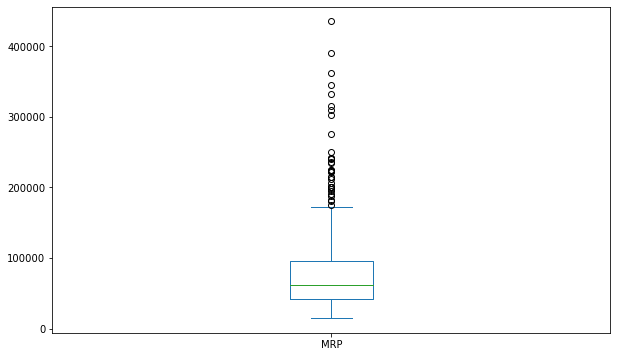

In [59]:
df['MRP'].plot(kind='box',figsize=(10,6))

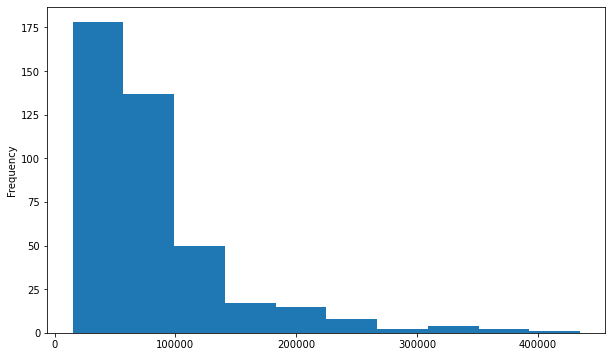

In [60]:
df['MRP'].plot(kind='hist',figsize=(10,6));


### Analysis of MRP column


In [61]:
print("Maximum", df['MRP'].max())
print("Minimum", df['MRP'].min())
print("Mean", df['MRP'].mean())
print("Median", df['MRP'].median())
print("Standard Deviation", df['MRP'].std())

Maximum 434830
Minimum 14990
Mean 80873.57246376811
Median 61493.5
Standard Deviation 61946.21436655378


##### Observation: Difference between Mean and median is high, hence there might be Outliers in the MRP column.



### Vizualization

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Brand', ylabel='MRP'>

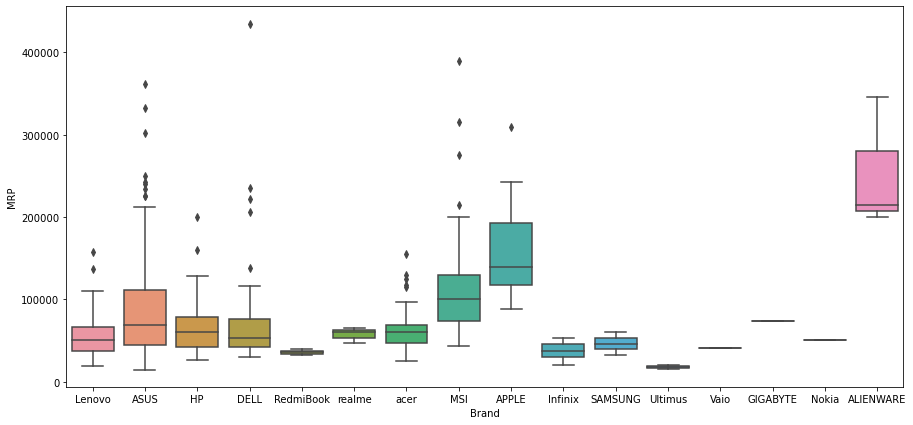

In [63]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

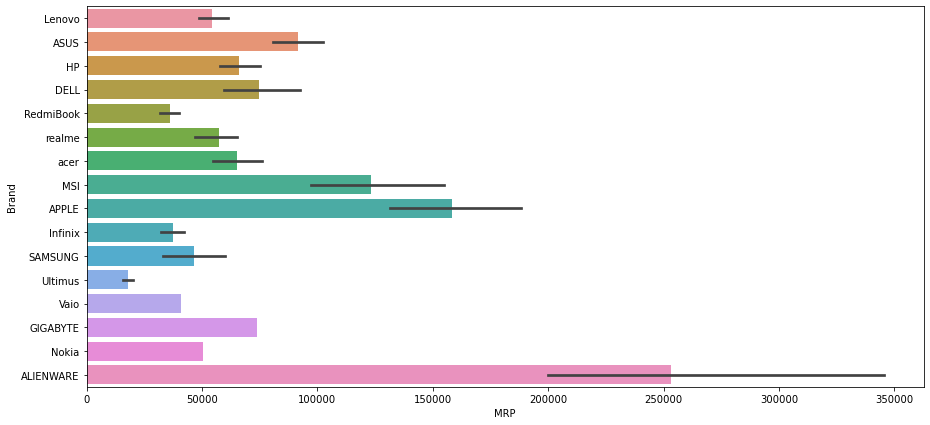

In [64]:
plt.figure(figsize=(15, 7))
sns.barplot(x='MRP', y ='Brand', data=df);

### Observation:
- Alienware brand laptop has more price compare to other laptops.

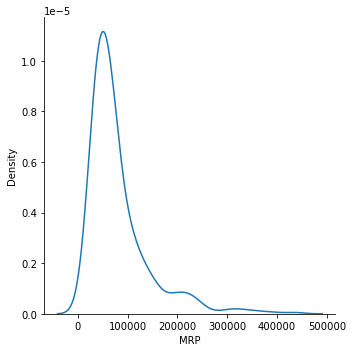

In [65]:
a = sns.displot(df.MRP, kind='kde')


<AxesSubplot:xlabel='Brand', ylabel='count'>

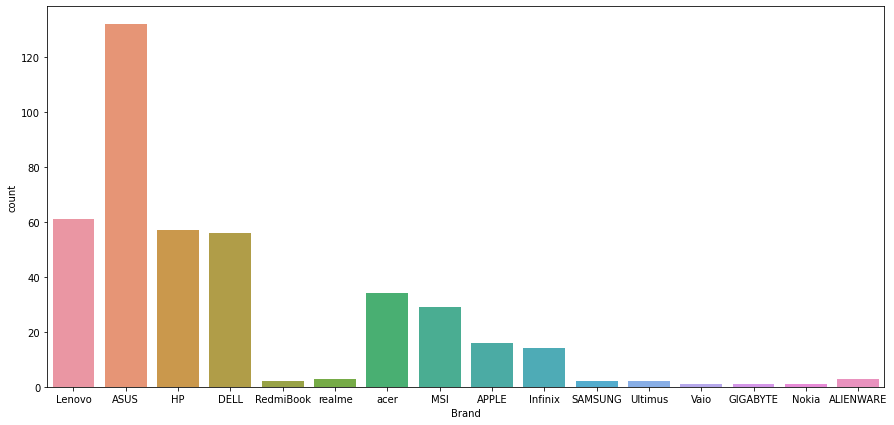

In [66]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.Brand)

In [67]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
              min     max           mean
Brand                                   
ALIENWARE  199990  345390  253390.000000
APPLE       88990  309490  158146.250000
ASUS        14990  361990   91515.196970
DELL        30428  434830   74613.232143
GIGABYTE    73990   73990   73990.000000
HP          25990  199990   65943.157895
Infinix     20990   52990   37347.142857
Lenovo      19490  157990   54489.147541
MSI         43990  389990  123411.344828
Nokia       50490   50490   50490.000000
RedmiBook   31990   39990   35990.000000
SAMSUNG     32990   59990   46490.000000
Ultimus     15990   19990   17990.000000
Vaio        40990   40990   40990.000000
acer        24990  155490   65000.764706
realme      46990   64999   57326.333333

<AxesSubplot:xlabel='Brand'>

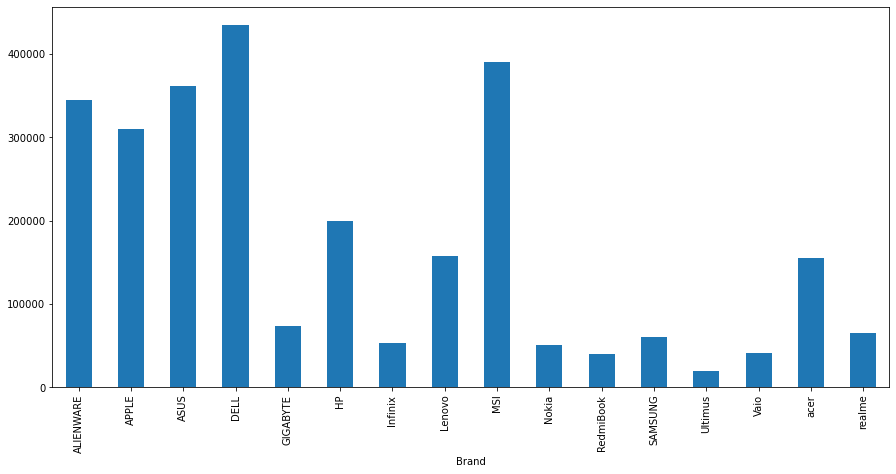

In [68]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='Brand'>

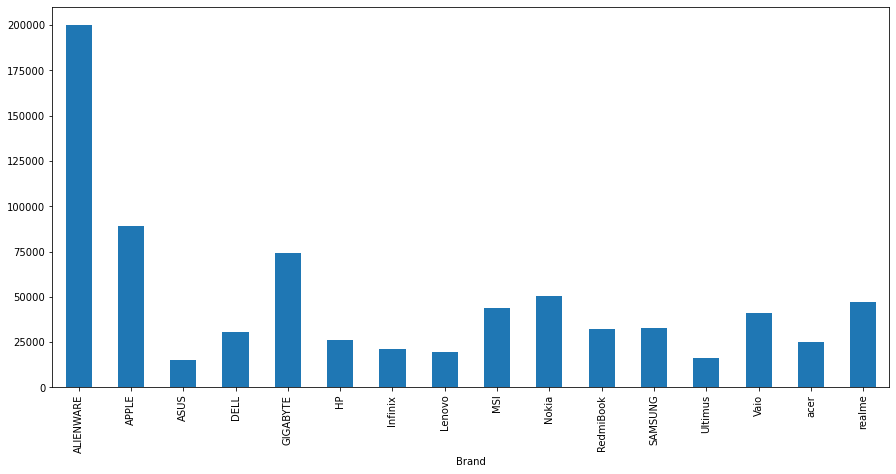

In [69]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')

<AxesSubplot:xlabel='MRP', ylabel='Rating'>

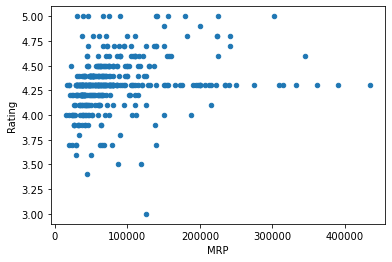

In [70]:

df.plot.scatter(x='MRP',y='Rating')

<AxesSubplot:xlabel='Operating_System', ylabel='MRP'>

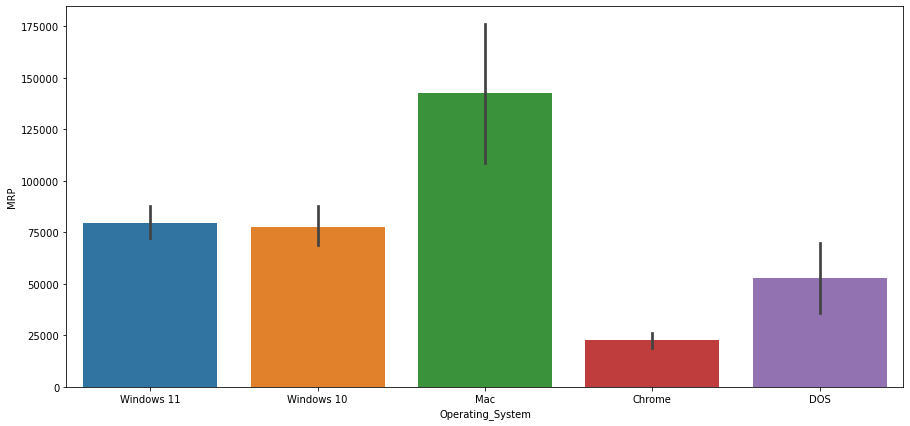

In [71]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Operating_System', y ='MRP', data=df)

### Observation:
- Mac Operating_System have more price compare to other operating systems

In [72]:
df.groupby('Processor').agg({'MRP' : ['min', 'max', 'mean']})

MRP                       
             min     max           mean
Processor                              
AMD        24990  361990   82406.542636
Apple      88990  309490  158146.250000
Intel      14990  434830   75701.063433
Qualcomm   32990   32990   32990.000000

<AxesSubplot:xlabel='Processor', ylabel='MRP'>

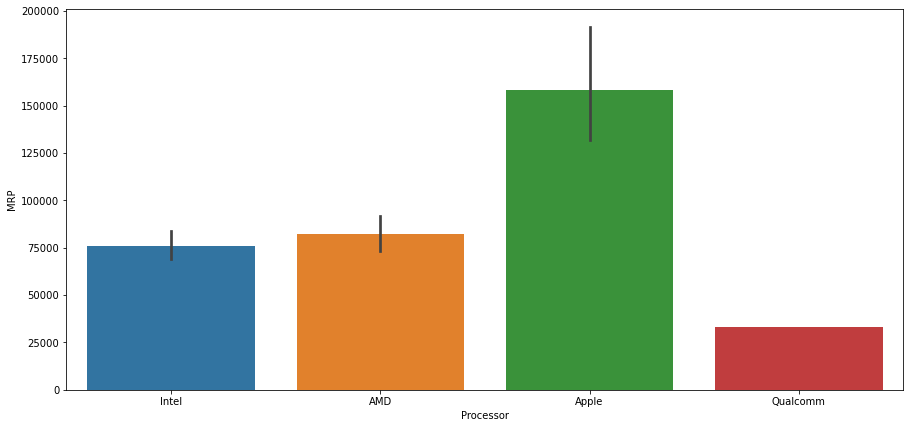

In [73]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Processor', y ='MRP', data=df)

### Observation:
- Apple processor has more price compare to other processors

In [74]:
df.groupby('RAM').agg({'MRP' : ['min', 'max', 'mean']}).T

RAM               16 GB      32 GB        4 GB           8 GB
MRP min    37990.000000  199990.00  14990.0000   22990.000000
    max   241990.000000  434830.00  61249.0000  149990.000000
    mean  109669.468966  291411.25  28996.1875   54249.447964

<AxesSubplot:xlabel='RAM', ylabel='MRP'>

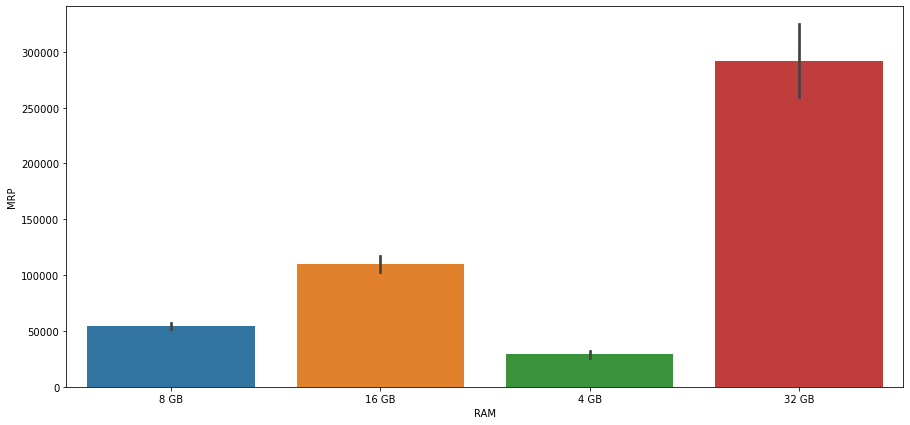

In [75]:
plt.figure(figsize=(15, 7))
sns.barplot(x='RAM', y ='MRP', data=df)

### Observation:- 
- 32 GB RAM has more price compare to other RAM 

<AxesSubplot:xlabel='RAM_Type', ylabel='MRP'>

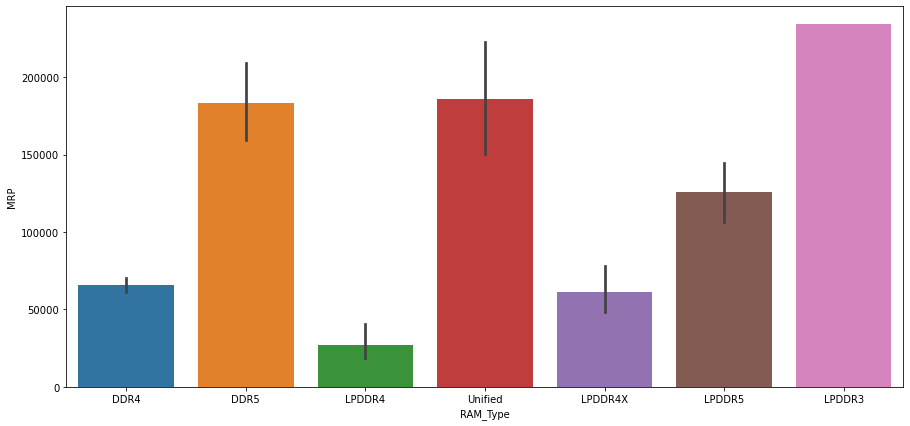

In [76]:
plt.figure(figsize=(15, 7))
sns.barplot(x='RAM_Type', y ='MRP', data=df)

### Observation:
- LPDDR3 RAM_TYPE have more price compare to the other ram_typyes

<AxesSubplot:xlabel='Disc Type', ylabel='MRP'>

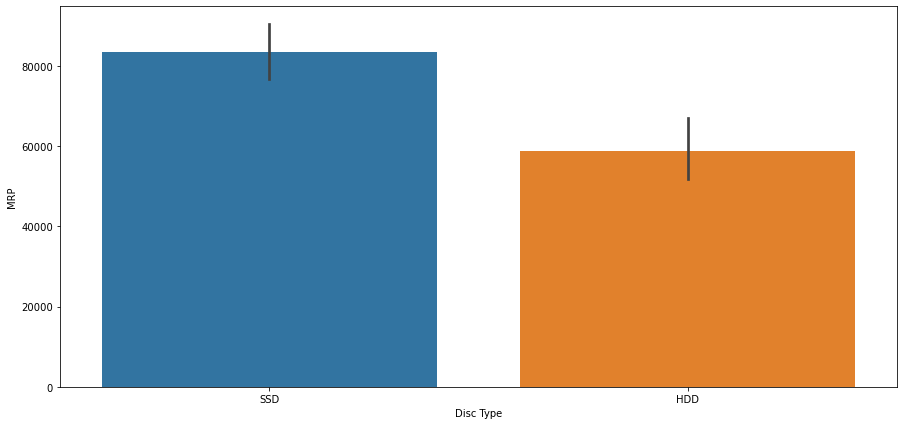

In [77]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Disc Type', y ='MRP', data=df)

### Observation:
- SSD price is more compare to HDD price

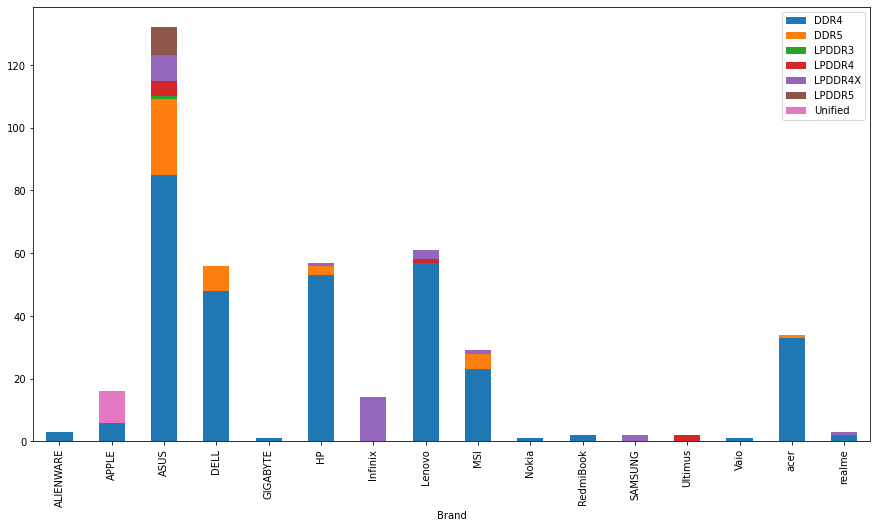

In [78]:
crosstab=pd.crosstab(df['Brand'],df['RAM_Type'])
crosstab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Observation:
- Brand Asus have different types of RAM_Types compare to other models

In [79]:
df['RAM'].unique()

array(['8 GB', '16 GB', '4 GB', '32 GB'], dtype=object)

### Build Machine Learning Model

In [80]:
df.head()

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [81]:
df=df[['Brand','Processor','Operating_System','RAM','RAM_Type','Disc Size','Disc Type','Display_inchs','MRP']]
df.head()

,Brand,Processor,Operating_System,RAM,RAM_Type,Disc Size,Disc Type,Display_inchs,MRP
0,Lenovo,Intel,Windows 11,8 GB,DDR4,256GB,SSD,14,36990
1,Lenovo,Intel,Windows 11,8 GB,DDR4,512GB,SSD,15.6,39990
2,ASUS,Intel,Windows 11,8 GB,DDR4,512GB,SSD,15.6,32990
3,HP,AMD,Windows 10,8 GB,DDR4,512GB,SSD,15.6,49990
4,ASUS,Intel,Windows 11,8 GB,DDR4,512GB,SSD,15.6,49990


### Separate the input and output

In [82]:
X=df[['Operating_System','RAM','RAM_Type','Disc Size']]
y=df[["MRP"]]

#### Label Encoding 
#### RAM ,DISK SIZE ,RAM_TYPE,OPERATING_SYSTEM 

In [83]:
X["RAM"].value_counts()

8 GB     221
16 GB    145
4 GB      32
32 GB     16
Name: RAM, dtype: int64

In [84]:
ram = {"32 GB":4,'16 GB':3,'8 GB':2,'4 GB':1}
X['RAM'] = X['RAM'].apply(lambda x: ram[x])

In [85]:
X["RAM_Type"].value_counts()

DDR4       315
DDR5        41
LPDDR4X     30
Unified     10
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_Type, dtype: int64

In [86]:
ram_type = {'Unified':7,'LPDDR5':6,'LPDDR4X':5,'LPDDR4':4,'LPDDR3':3,'DDR5':2,'DDR4':1}
X['RAM_Type'] = X['RAM_Type'].apply(lambda x: ram_type[x])

In [87]:
X['Disc Size'].value_counts()

512GB    218
1TB      115
256GB     62
128GB      6
64GB       6
2TB        6
32GB       1
Name: Disc Size, dtype: int64

In [88]:
storage_ssd={"2TB":7,"1TB":6,"512GB":5,"256GB":4,"128GB":3,"64GB":2,"32GB":1}
X['Disc Size'] = X['Disc Size'].apply(lambda x: storage_ssd[x])

In [89]:
X["Operating_System"].value_counts()

Windows 11    273
Windows 10    115
Mac            18
Chrome          6
DOS             2
Name: Operating_System, dtype: int64

In [90]:
os={"DOS":1,"Windows 10":3,"Windows 11":4,"Chrome":2,"Mac":5}
X['Operating_System'] = X['Operating_System'].apply(lambda x: os[x])

### Split the Data into train and test

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [92]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics


### Random Forest Regression

In [96]:
from sklearn.ensemble import RandomForestRegressor   
tree=RandomForestRegressor(max_depth=19)


In [97]:
tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=19)

In [98]:
y_train_pred=tree.predict(X_train)
r2=metrics.r2_score(y_train,y_train_pred)

n = len(y_train)
k = X_train.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)
r2

0.8731255168558479


0.8745755109489239

In [101]:
y_test_pred=tree.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)
r2

0.8101034172279934


0.822354809664897

### Hyperparameter Tunning by using GridSearchCv

In [102]:
tuned_parameters = [{'max_depth':[i for i in range(1, 51)]}]


clf = GridSearchCV(
    estimator=tree ,
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1,
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=19),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 38}
RandomForestRegressor(max_depth=38)

Score on Test Data:  0.8198182201667031


In [104]:
cv_results1 = pd.DataFrame(clf.cv_results_)

cv_results1[cv_results1["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
37,0.089658,0.010732,0.006991,0.003847,38,{'max_depth': 38},0.746487,0.848751,0.879406,0.684737,...,0.780182,0.072507,1,0.878811,0.873883,0.856344,0.896529,0.891118,0.879337,0.014093


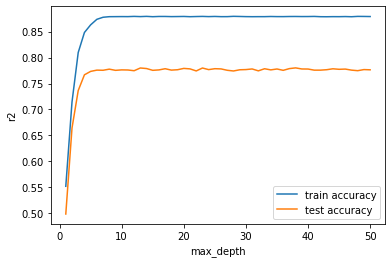

In [105]:
plt.plot(cv_results1['param_max_depth'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_max_depth'], cv_results1['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')

### Observation:
- .Randomforest regressor is the best model at max_depth=19

### Pickle 

In [106]:
import pickle

file = open('dataframe.pkl','wb')

pickle.dump(tree,file)